# Hands-on Activity 6.1 Recurrent Neural Networks

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2023-2024
--- | ---
<u>**ACTIVITY NO. 6.1** | **Recurrent_Neural_Networks**
**Name** | Mendoza, Paulo
--- | ---
**Section** | CPE32S8
**Date Performed**: | May 10, 2024
**Date Submitted**: | May 10, 2024
**Instructor**: | Engr. Roman M. Richard

#### Objective(s):

This activity aims to introduce how to build a recurrent neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural recurrent neural network
* Evaluate the score and accuracy of the recurrent neural network

#### Resources:
* Jupyter Notebook
* IMDB

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb
from keras import initializers

* Set the max_features to 20000
* Set the maximum length of a sequence
* Use the batch size of 32

In [2]:
max_features = 20000
maxlen = 30
batch_size = 32

Load the data

In [3]:

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


 Truncates the sequences so that they are of the maximum length

In [4]:

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 30)
x_test shape: (25000, 30)


Check the example of sequence

In [5]:
x_train[123,:]

array([  219,   141,    35,   221,   956,    54,    13,    16,    11,
        2714,    61,   322,   423,    12,    38,    76,    59,  1803,
          72,     8, 10508,    23,     5,   967,    12,    38,    85,
          62,   358,    99], dtype=int32)

In [11]:
x_train[0]

array([  18,   51,   36,   28,  224,   92,   25,  104,    4,  226,   65,
         16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,  113,
        103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

In [17]:
y_train[10]

1

Build a recurrent neural network

In [6]:
rnn_hidden_dim = 5
word_embedding_dim = 50
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, word_embedding_dim))  #This layer takes each integer in the sequence and embeds it in a 50-dimensional vector
model_rnn.add(SimpleRNN(rnn_hidden_dim,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=x_train.shape[1:]))

model_rnn.add(Dense(1, activation='sigmoid'))

In [7]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 5)                 280       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 1000286 (3.82 MB)
Trainable params: 1000286 (3.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

model_rnn.compile(loss='binary_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [9]:
model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 16s 19ms/step - loss: 0.5558 - accuracy: 0.7022 - val_loss: 0.4632 - val_accuracy: 0.7766
Epoch 2/10
782/782 [==============================] - 14s 18ms/step - loss: 0.4161 - accuracy: 0.8083 - val_loss: 0.4480 - val_accuracy: 0.7870
Epoch 3/10
782/782 [==============================] - 14s 18ms/step - loss: 0.3781 - accuracy: 0.8300 - val_loss: 0.4673 - val_accuracy: 0.7822
Epoch 4/10
782/782 [==============================] - 15s 20ms/step - loss: 0.3548 - accuracy: 0.8435 - val_loss: 0.4515 - val_accuracy: 0.7838
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.3361 - accuracy: 0.8564 - val_loss: 0.4465 - val_accuracy: 0.7914
Epoch 6/10
782/782 [==============================] - 14s 18ms/step - loss: 0.3173 - accuracy: 0.8648 - val_loss: 0.4840 - val_accuracy: 0.7737
Epoch 7/10
782/782 [==============================] - 13s 17ms/step - loss: 0.3013 - accuracy: 0.8738 - val_loss: 0.4826 - val_accuracy:

Evaluate the model using the test set.

In [10]:
score, acc = model_rnn.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 3s 3ms/step - loss: 0.5021 - accuracy: 0.7818
Test score: 0.5021035671234131
Test accuracy: 0.7817599773406982


Interpret the result

The model achieves a test loss of approximately 0.502 and a test accuracy of approximately 0.781, it means moderate performance in the binary classification task. The model was able to tell if the sentiment is positive or negative 78% of the time correctly.

#### Supplementary Activity

- Prepare the data to use sequences of length 80 rather than length 30.  Did it improve the performance?
- Try different values of the "max_features".  Can you improve the performance?
- Try smaller and larger sizes of the RNN hidden dimension.  How does it affect the model performance?  How does it affect the run time?

Note: answer can be seen after the implementation

*This is my own data using the parameters from before*

In [53]:
import numpy as np
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Load the Reuters dataset
max_features = 20000
maxlen = 30
batch_size = 32

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

8982 train sequences
2246 test sequences


In [54]:
# Preprocess the data
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# One-hot encode the labels
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


x_train shape: (8982, 30)
x_test shape: (2246, 30)


In [55]:
x_train[123,:]

array([   0,    0,    0,    0,    0,    0,    1,  144,   62,  155,  361,
       1094, 2618,    9,  155, 1094,   62, 2143,    6, 3177,   28, 3298,
        519,    6,    4, 3298, 4444,  108,   17,   12], dtype=int32)

In [56]:
# Build the model
rnn_hidden_dim = 5
word_embedding_dim = 50
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, word_embedding_dim))
model_rnn.add(SimpleRNN(rnn_hidden_dim,
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',
                    input_shape=x_train.shape[1:]))

model_rnn.add(Dense(num_classes, activation='softmax'))


In [57]:
model_rnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 50)          1000000   
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 5)                 280       
                                                                 
 dense_6 (Dense)             (None, 46)                276       
                                                                 
Total params: 1000556 (3.82 MB)
Trainable params: 1000556 (3.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
rmsprop = keras.optimizers.RMSprop(lr = .0001)

model_rnn.compile(loss='categorical_crossentropy',
              optimizer=rmsprop,
              metrics=['accuracy'])

In [59]:

# Train the model
history = model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

# Evaluate the model
score, acc = model_rnn.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/10
281/281 [==============================] - 5s 13ms/step - loss: 2.2767 - accuracy: 0.3515 - val_loss: 1.9469 - val_accuracy: 0.4804
Epoch 2/10
281/281 [==============================] - 4s 14ms/step - loss: 1.8500 - accuracy: 0.4932 - val_loss: 1.8587 - val_accuracy: 0.5004
Epoch 3/10
281/281 [==============================] - 5s 19ms/step - loss: 1.7435 - accuracy: 0.5136 - val_loss: 1.8384 - val_accuracy: 0.5067
Epoch 4/10
281/281 [==============================] - 4s 13ms/step - loss: 1.6763 - accuracy: 0.5253 - val_loss: 1.8131 - val_accuracy: 0.5160
Epoch 5/10
281/281 [==============================] - 6s 20ms/step - loss: 1.5982 - accuracy: 0.5436 - val_loss: 1.7858 - val_accuracy: 0.5378
Epoch 6/10
281/281 [==============================] - 5s 18ms/step - loss: 1.5065 - accuracy: 0.5890 - val_loss: 1.7679 - val_accuracy: 0.5561
Epoch 7/10
281/281 [==============================] - 6s 20ms/step - loss: 1.4392 - accuracy: 0.6049 - val_loss: 1.7617 - val_accuracy: 0.5525

In [85]:
different_parameters(20000,30,5)

8982 train sequences
2246 test sequences
x_train shape: (8982, 30)
x_test shape: (2246, 30)
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, None, 50)          1000000   
                                                                 
 simple_rnn_27 (SimpleRNN)   (None, 5)                 280       
                                                                 
 dense_27 (Dense)            (None, 46)                276       
                                                                 
Total params: 1000556 (3.82 MB)
Trainable params: 1000556 (3.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
281/281 [==============================] - 10s 32ms/step - loss: 2.3153 - accuracy: 0.4029 - val_loss: 1.9571 - val_accuracy: 0.4947
Epoch 2/10
281/281 [==============================] - 4s 15ms/step - loss: 1.8241 - accuracy: 0.4979 - val_loss: 1.8434 - val_accuracy: 0.5027
Epoch 3/10
281/281 [==============================] - 4s 14ms/step - loss: 1.7242 - accuracy: 0.5107 - val_loss: 1.8115 - val_accuracy: 0.5062
Epoch 4/10
281/281 [==============================] - 5s 19ms/step - loss: 1.6476 - accuracy: 0.5215 - val_loss: 1.8074 - val_accuracy: 0.5089
Epoch 5/10
281/281 [==============================] - 6s 20ms/step - loss: 1.5830 - accuracy: 0.5446 - val_loss: 1.8325 - val_accuracy: 0.5196
Epoch 6/10
281/281 [==============================] - 6s 20ms/step - loss: 1.5245 - accuracy: 0.5715 - val_loss: 1.7947 - val_accuracy: 0.5441
Epoch 7/10
281/281 [==============================] - 8s 30ms/step - loss: 1.4725 - accuracy: 0.5862 - val_loss: 1.7709 - val_accuracy: 0.535

In [86]:
# Train the model
history = model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))


Epoch 1/10
281/281 [==============================] - 11s 40ms/step - loss: 1.6000 - accuracy: 0.5607 - val_loss: 1.6845 - val_accuracy: 0.5628
Epoch 2/10
281/281 [==============================] - 8s 28ms/step - loss: 1.4860 - accuracy: 0.5882 - val_loss: 1.6978 - val_accuracy: 0.5748
Epoch 3/10
281/281 [==============================] - 8s 29ms/step - loss: 1.4039 - accuracy: 0.6157 - val_loss: 1.6657 - val_accuracy: 0.5846
Epoch 4/10
281/281 [==============================] - 11s 41ms/step - loss: 1.3367 - accuracy: 0.6367 - val_loss: 1.6364 - val_accuracy: 0.5962
Epoch 5/10
281/281 [==============================] - 8s 27ms/step - loss: 1.2863 - accuracy: 0.6533 - val_loss: 1.6368 - val_accuracy: 0.6015
Epoch 6/10
281/281 [==============================] - 8s 30ms/step - loss: 1.2425 - accuracy: 0.6680 - val_loss: 1.6618 - val_accuracy: 0.6024
Epoch 7/10
281/281 [==============================] - 9s 32ms/step - loss: 1.2028 - accuracy: 0.6814 - val_loss: 1.6795 - val_accuracy: 0.59

In [87]:
# Train the model
history = model_rnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))


Epoch 1/10
281/281 [==============================] - 8s 27ms/step - loss: 1.0825 - accuracy: 0.7114 - val_loss: 1.7340 - val_accuracy: 0.5966
Epoch 2/10
281/281 [==============================] - 9s 32ms/step - loss: 1.0593 - accuracy: 0.7217 - val_loss: 1.8531 - val_accuracy: 0.5908
Epoch 3/10
281/281 [==============================] - 10s 34ms/step - loss: 1.0377 - accuracy: 0.7307 - val_loss: 1.8247 - val_accuracy: 0.5962
Epoch 4/10
281/281 [==============================] - 9s 32ms/step - loss: 1.0194 - accuracy: 0.7335 - val_loss: 1.8681 - val_accuracy: 0.5971
Epoch 5/10
281/281 [==============================] - 9s 31ms/step - loss: 0.9953 - accuracy: 0.7407 - val_loss: 1.8518 - val_accuracy: 0.5841
Epoch 6/10
281/281 [==============================] - 8s 29ms/step - loss: 0.9728 - accuracy: 0.7439 - val_loss: 1.9425 - val_accuracy: 0.5980
Epoch 7/10
281/281 [==============================] - 10s 35ms/step - loss: 0.9582 - accuracy: 0.7488 - val_loss: 1.9571 - val_accuracy: 0.58

In [88]:
# Evaluate the model
score, acc = model_rnn.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

71/71 [==============================] - 1s 10ms/step - loss: 2.1178 - accuracy: 0.5939
Test score: 2.117785692214966
Test accuracy: 0.593944787979126


*This is my own data using the parameters from supplementary*

In [77]:
def different_parameters(max_features, maxlen, rnn_hidden_dim):

  max_features = max_features       # changed from 20000
  maxlen = maxlen                   # changed from 30
  batch_size = 32

  (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

  print(len(x_train), 'train sequences')
  print(len(x_test), 'test sequences')

  # Preprocess the data
  x_train = pad_sequences(x_train, maxlen=maxlen)
  x_test = pad_sequences(x_test, maxlen=maxlen)
  print('x_train shape:', x_train.shape)
  print('x_test shape:', x_test.shape)

  # One-hot encode the labels
  num_classes = np.max(y_train) + 1
  y_train = to_categorical(y_train, num_classes=num_classes)
  y_test = to_categorical(y_test, num_classes=num_classes)

  # Build the model
  rnn_hidden_dim = rnn_hidden_dim      # changed from 5
  word_embedding_dim = 50
  model_rnn = Sequential()
  model_rnn.add(Embedding(max_features, word_embedding_dim))
  model_rnn.add(SimpleRNN(rnn_hidden_dim,
                      kernel_initializer=initializers.RandomNormal(stddev=0.001),
                      recurrent_initializer=initializers.Identity(gain=1.0),
                      activation='relu',
                      input_shape=x_train.shape[1:]))

  model_rnn.add(Dense(num_classes, activation='softmax'))

  model_rnn.summary()

  rmsprop = keras.optimizers.RMSprop(lr = .0001)

  model_rnn.compile(loss='categorical_crossentropy',
                optimizer=rmsprop,
                metrics=['accuracy'])

  # Train the model
  history = model_rnn.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=10,
            validation_data=(x_test, y_test))

  # Evaluate the model
  score, acc = model_rnn.evaluate(x_test, y_test,
                              batch_size=batch_size)
  print('Test score:', score)
  print('Test accuracy:', acc)

In [83]:
# max_features=20000, maxlen=30, rnn_hidden_dim=5
# Prepare the data to use sequences of length 80 rather than length 30. Did it improve the performance?
different_parameters(20000,80,5)
different_parameters(20000,20,5)

8982 train sequences
2246 test sequences
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, None, 50)          1000000   
                                                                 
 simple_rnn_24 (SimpleRNN)   (None, 5)                 280       
                                                                 
 dense_24 (Dense)            (None, 46)                276       
                                                                 
Total params: 1000556 (3.82 MB)
Trainable params: 1000556 (3.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
281/281 [==============================] - 10s 32ms/step - loss: 2.4584 - accuracy: 0.2997 - val_loss: 2.1069 - val_accuracy: 0.3847
Epoch 2/10
281/281 [==============================] - 7s 24ms/step - loss: 1.8820 - accuracy: 0.4659 - val_loss: 1.8153 - val_accuracy: 0.5183
Epoch 3/10
281/281 [==============================] - 9s 31ms/step - loss: 1.6718 - accuracy: 0.5450 - val_loss: 1.7437 - val_accuracy: 0.5307
Epoch 4/10
281/281 [==============================] - 8s 28ms/step - loss: 1.5659 - accuracy: 0.5725 - val_loss: 1.6651 - val_accuracy: 0.5610
Epoch 5/10
281/281 [==============================] - 7s 25ms/step - loss: 1.4905 - accuracy: 0.5898 - val_loss: 1.6381 - val_accuracy: 0.5659
Epoch 6/10
281/281 [==============================] - 8s 30ms/step - loss: 1.4335 - accuracy: 0.5975 - val_loss: 1.6799 - val_accuracy: 0.5623
Epoch 7/10
281/281 [==============================] - 8s 28ms/step - loss: 1.3892 - accuracy: 0.6069 - val_loss: 1.6507 - val_accuracy: 0.578

Epoch 1/10
281/281 [==============================] - 7s 21ms/step - loss: 2.8047 - accuracy: 0.2435 - val_loss: 2.1724 - val_accuracy: 0.3624
Epoch 2/10
281/281 [==============================] - 4s 13ms/step - loss: 2.0707 - accuracy: 0.3584 - val_loss: 2.0493 - val_accuracy: 0.3896
Epoch 3/10
281/281 [==============================] - 3s 12ms/step - loss: 1.9872 - accuracy: 0.3828 - val_loss: 2.0244 - val_accuracy: 0.4248
Epoch 4/10
281/281 [==============================] - 4s 13ms/step - loss: 1.9477 - accuracy: 0.4100 - val_loss: 2.0106 - val_accuracy: 0.4452
Epoch 5/10
281/281 [==============================] - 4s 14ms/step - loss: 1.9188 - accuracy: 0.4286 - val_loss: 2.0034 - val_accuracy: 0.4403
Epoch 6/10
281/281 [==============================] - 3s 11ms/step - loss: 1.8975 - accuracy: 0.4383 - val_loss: 2.0041 - val_accuracy: 0.4590
Epoch 7/10
281/281 [==============================] - 3s 12ms/step - loss: 1.8785 - accuracy: 0.4498 - val_loss: 2.0042 - val_accuracy: 0.4568

In [81]:
# max_features=20000, maxlen=30, rnn_hidden_dim=5
# Try different values of the "max_features". Can you improve the performance?
different_parameters(15000,30,5)
different_parameters(25000,30,5)

8982 train sequences
2246 test sequences
x_train shape: (8982, 30)
x_test shape: (2246, 30)
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, None, 50)          750000    
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 5)                 280       
                                                                 
 dense_20 (Dense)            (None, 46)                276       
                                                                 
Total params: 750556 (2.86 MB)
Trainable params: 750556 (2.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
281/281 [==============================] - 5s 15ms/step - loss: 2.3652 - accuracy: 0.3624 - val_loss: 1.9258 - val_accuracy: 0.4969
Epoch 2/10
281/281 [==============================] - 4s 16ms/step - loss: 1.8343 - accuracy: 0.5011 - val_loss: 1.8421 - val_accuracy: 0.4991
Epoch 3/10
281/281 [==============================] - 4s 13ms/step - loss: 1.7317 - accuracy: 0.5125 - val_loss: 1.8081 - val_accuracy: 0.5107
Epoch 4/10
281/281 [==============================] - 5s 18ms/step - loss: 1.6549 - accuracy: 0.5265 - val_loss: 1.8033 - val_accuracy: 0.5347
Epoch 5/10
281/281 [==============================] - 5s 18ms/step - loss: 1.5830 - accuracy: 0.5608 - val_loss: 1.8056 - val_accuracy: 0.5329
Epoch 6/10
281/281 [==============================] - 4s 13ms/step - loss: 1.5155 - accuracy: 0.5864 - val_loss: 1.7925 - val_accuracy: 0.5490
Epoch 7/10
281/281 [==============================] - 4s 13ms/step - loss: 1.4463 - accuracy: 0.6045 - val_loss: 1.7603 - val_accuracy: 0.5610

Epoch 1/10
281/281 [==============================] - 8s 24ms/step - loss: 2.4914 - accuracy: 0.2878 - val_loss: 2.0824 - val_accuracy: 0.3624
Epoch 2/10
281/281 [==============================] - 4s 15ms/step - loss: 2.0142 - accuracy: 0.3533 - val_loss: 1.9968 - val_accuracy: 0.3878
Epoch 3/10
281/281 [==============================] - 4s 14ms/step - loss: 1.9310 - accuracy: 0.3860 - val_loss: 1.9815 - val_accuracy: 0.4118
Epoch 4/10
281/281 [==============================] - 6s 21ms/step - loss: 1.8588 - accuracy: 0.4568 - val_loss: 1.9210 - val_accuracy: 0.4840
Epoch 5/10
281/281 [==============================] - 5s 17ms/step - loss: 1.7457 - accuracy: 0.5012 - val_loss: 1.8441 - val_accuracy: 0.4987
Epoch 6/10
281/281 [==============================] - 4s 14ms/step - loss: 1.6392 - accuracy: 0.5416 - val_loss: 1.8089 - val_accuracy: 0.5276
Epoch 7/10
281/281 [==============================] - 5s 18ms/step - loss: 1.5472 - accuracy: 0.5730 - val_loss: 1.7827 - val_accuracy: 0.5356

In [82]:
# max_features=20000, maxlen=30, rnn_hidden_dim=5
# Try smaller and larger sizes of the RNN hidden dimension. How does it affect the model performance? How does it affect the run time?
different_parameters(20000,30,3)
different_parameters(20000,30,7)

8982 train sequences
2246 test sequences
x_train shape: (8982, 30)
x_test shape: (2246, 30)
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, None, 50)          1000000   
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, 3)                 162       
                                                                 
 dense_22 (Dense)            (None, 46)                184       
                                                                 
Total params: 1000346 (3.82 MB)
Trainable params: 1000346 (3.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
281/281 [==============================] - 6s 17ms/step - loss: 2.3660 - accuracy: 0.3821 - val_loss: 1.9530 - val_accuracy: 0.4835
Epoch 2/10
281/281 [==============================] - 4s 13ms/step - loss: 1.8443 - accuracy: 0.4949 - val_loss: 1.8407 - val_accuracy: 0.5031
Epoch 3/10
281/281 [==============================] - 4s 13ms/step - loss: 1.7235 - accuracy: 0.5156 - val_loss: 1.8051 - val_accuracy: 0.5102
Epoch 4/10
281/281 [==============================] - 5s 18ms/step - loss: 1.6372 - accuracy: 0.5287 - val_loss: 1.8362 - val_accuracy: 0.5134
Epoch 5/10
281/281 [==============================] - 4s 16ms/step - loss: 1.5465 - accuracy: 0.5615 - val_loss: 1.7619 - val_accuracy: 0.5503
Epoch 6/10
281/281 [==============================] - 4s 16ms/step - loss: 1.4559 - accuracy: 0.6079 - val_loss: 1.7470 - val_accuracy: 0.5668
Epoch 7/10
281/281 [==============================] - 5s 17ms/step - loss: 1.3808 - accuracy: 0.6336 - val_loss: 1.7351 - val_accuracy: 0.5739

Epoch 1/10
281/281 [==============================] - 7s 20ms/step - loss: 2.3680 - accuracy: 0.3218 - val_loss: 2.0070 - val_accuracy: 0.4711
Epoch 2/10
281/281 [==============================] - 5s 18ms/step - loss: 1.8136 - accuracy: 0.5085 - val_loss: 1.7917 - val_accuracy: 0.5423
Epoch 3/10
281/281 [==============================] - 4s 14ms/step - loss: 1.6115 - accuracy: 0.5740 - val_loss: 1.7001 - val_accuracy: 0.5641
Epoch 4/10
281/281 [==============================] - 4s 14ms/step - loss: 1.4698 - accuracy: 0.6029 - val_loss: 1.6526 - val_accuracy: 0.5788
Epoch 5/10
281/281 [==============================] - 4s 15ms/step - loss: 1.3479 - accuracy: 0.6377 - val_loss: 1.6470 - val_accuracy: 0.5917
Epoch 6/10
281/281 [==============================] - 5s 16ms/step - loss: 1.2499 - accuracy: 0.6641 - val_loss: 1.6404 - val_accuracy: 0.5815
Epoch 7/10
281/281 [==============================] - 4s 13ms/step - loss: 1.1638 - accuracy: 0.6941 - val_loss: 1.6413 - val_accuracy: 0.5864

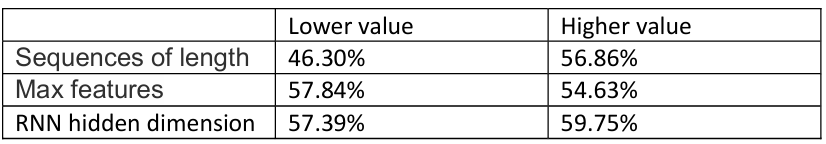

**Prepare the data to use sequences of length 80 rather than length 30. Did it improve the performance?**

Yes it did improve it.

**Try different values of the "max_features". Can you improve the performance?**
In my specific dataset and layers lowering the value makes the accuracy better and vice versa.

**Try smaller and larger sizes of the RNN hidden dimension. How does it affect the model performance? How does it affect the run time?**

The smaller hidden dimension result in lower accuracy while the higher result in higher accuracy. Their execution time is almost the same. But in more complex dataset it might result is different conclusion.

# Conclusion


RNN serves a very different purpose than the CNN we have used before RNN uses long term dependencies hence it is suitable for tasks like NLP. This type of model is good for complex nonlinear relationships and long-term dependencies. Unlike ARIMA an SARIMA that uses linear relationship and also not a deep learning mdoel

# Google Collab Link:

https://colab.research.google.com/drive/1prggt3nI_DTWdTc-BBPP9SbMHFeSUg7b?usp=sharing